In [34]:
from matplotlib.image import imread
import matplotlib.pyplot as plt
import numpy as np
import os
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.preprocessing import MinMaxScaler
from scipy.spatial.distance import cdist

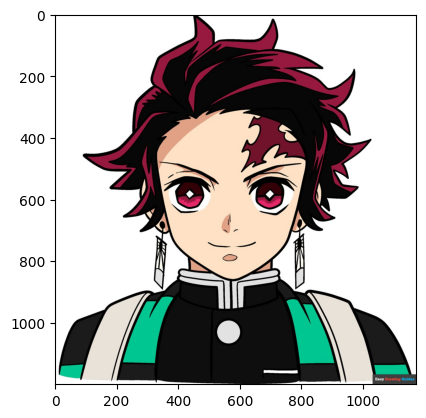

In [35]:
image = imread(os.path.join("Tanjiro-image.jpg"))
plt.imshow(image)

In [36]:
X = image.reshape(-1, 3)

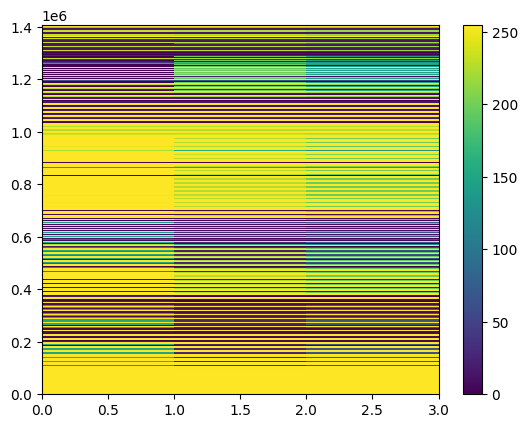

In [37]:
plt.pcolormesh(X)
plt.colorbar()

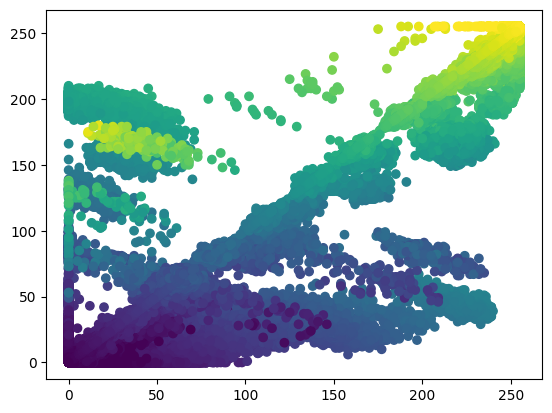

In [38]:
plt.scatter(X[:,0], X[:,1], c=X[:,2])
plt.show()

- Hacer una matriz N x 5 dimensiones, donde una columna es R, otra G, otra B, y las otras dos  los ejes X y Y. Donde N es 1200x1173.

In [39]:
h, w, _ = image.shape

vr = np.linspace(0, h, h, endpoint=False)
vc = np.linspace(0, w, w, endpoint=False)
Xc = np.kron(np.ones((h,1)), vc.reshape(-1,1))
Xr = np.kron(vr.reshape(-1,1), np.ones((1,w)))
Xc =Xc.reshape(-1)
Xr = Xr.reshape(-1)
X_kron = np.c_[X, Xc, Xr]
X_kron.shape

(1407600, 5)

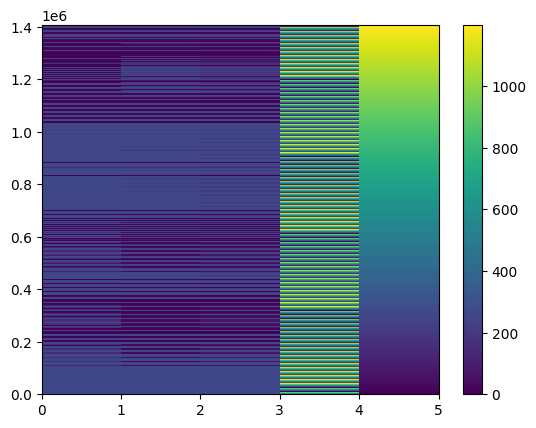

In [40]:
plt.pcolormesh(X_kron)
plt.colorbar()
plt.show()

In [41]:
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_kron)

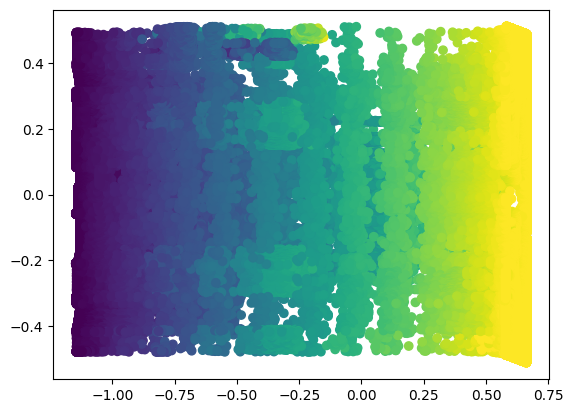

In [42]:
X_pca = PCA(n_components=2).fit_transform(X_train)
plt.scatter(X_pca[:,0], X_pca[:,1], c=X[:,2])
plt.show()

In [43]:
k      = 4
kmeans = KMeans(n_clusters=k,n_init='auto').fit(X_train)
kmeans.labels_


array([2, 2, 2, ..., 3, 3, 3])

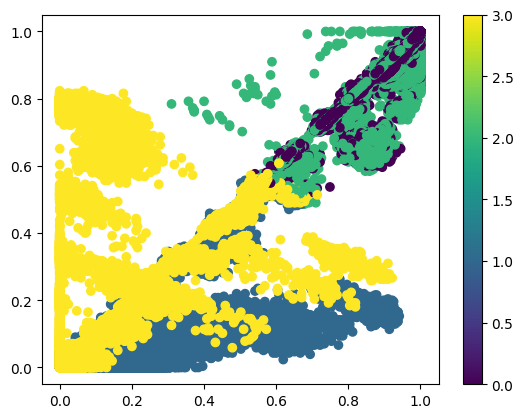

In [44]:
plt.scatter(X_train[:,0], X_train[:,1], c=kmeans.labels_)

plt.colorbar()
plt.show()

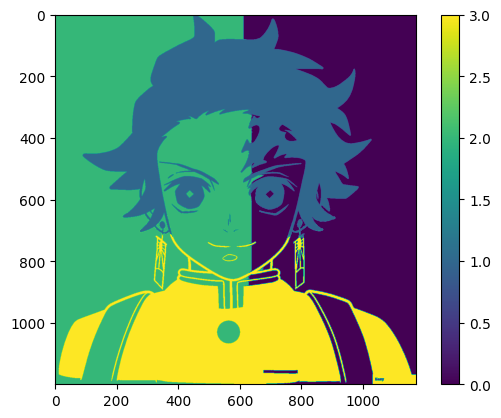

In [45]:
labels_ = kmeans.labels_
Ilabels = labels_.reshape(h,w)
plt.imshow(Ilabels)
plt.colorbar()
plt.show()

In [46]:
D_ = kmeans.transform(X_train)
D_.shape
ind_ = np.argmin(D_,axis=0)

In [47]:
D_.shape
ind_

array([ 651978,  422914,  630191, 1246309], dtype=int64)

In [48]:
centroids_ = X[ind_,:3]
centroids_

array([[250, 250, 250],
       [ 45,   7,  20],
       [255, 241, 234],
       [ 32,  32,  32]], dtype=uint8)

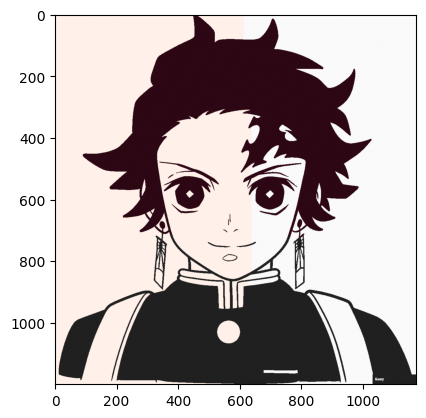

In [49]:
segmented_img = centroids_[kmeans.labels_]
segmented_img = segmented_img.reshape(image.shape)
plt.imshow(segmented_img/255.)

plt.show()

In [50]:
centroids_[kmeans.labels_]

array([[255, 241, 234],
       [255, 241, 234],
       [255, 241, 234],
       ...,
       [ 32,  32,  32],
       [ 32,  32,  32],
       [ 32,  32,  32]], dtype=uint8)

In [51]:
kmeans.labels_

array([2, 2, 2, ..., 3, 3, 3])